In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("datasets/HR/aug_test.csv")

In [3]:
dataset.sample(5)
dataset.dtypes

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
91,1680,city_19,0.682,Male,Has relevent experience,no_enrollment,Masters,STEM,19,1000-4999,NaN,4,99
552,13748,city_73,0.754,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,1,41
121,19567,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,12,1000-4999,Pvt Ltd,1,42
838,15566,city_13,0.827,Male,Has relevent experience,Part time course,High School,NaN,6,500-999,Pvt Ltd,2,12
1455,15682,city_40,0.776,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,50-99,Pvt Ltd,>4,86


In [5]:
dataset.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [6]:
dataset.shape

(2129, 13)

Text(0.5, 1.0, 'Missing value heatmap')

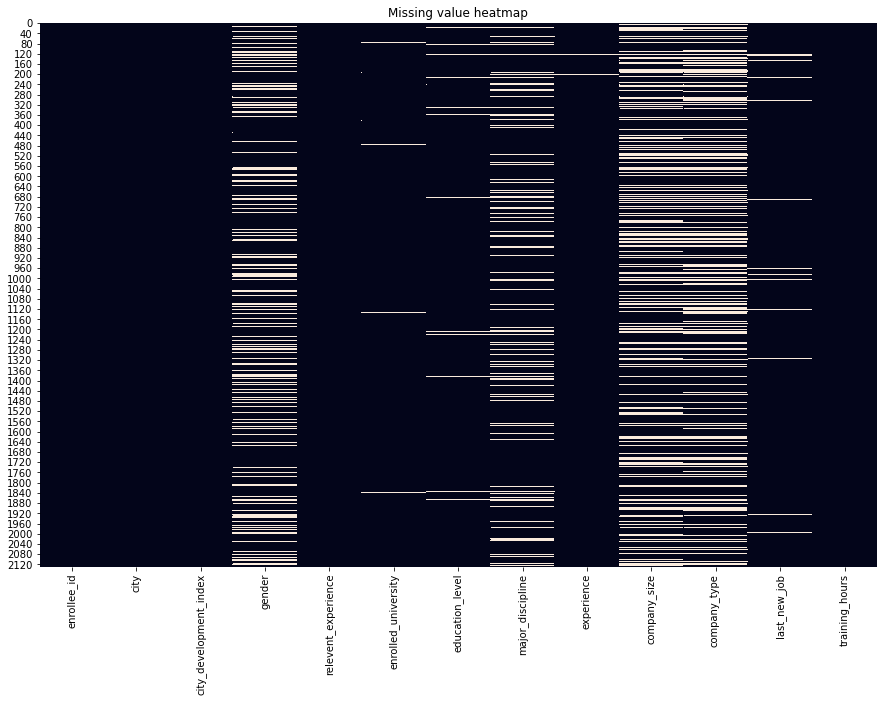

In [7]:
plt.figure(figsize=(15, 10))
sns.heatmap(dataset.isnull(),cbar = False).set_title("Missing value heatmap")

In [8]:
dataset.dropna(subset=['gender','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job'], inplace=True)

In [9]:
dataset.shape

(1019, 13)

In [10]:
dataset.nunique()

enrollee_id               1019
city                        88
city_development_index      70
gender                       3
relevent_experience          2
enrolled_university          3
education_level              3
major_discipline             6
experience                  22
company_size                 8
company_type                 6
last_new_job                 6
training_hours             193
dtype: int64